<a href="https://colab.research.google.com/github/DeadLetterQueue/prettymaps/blob/main/ReadGPXFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install overpy
!pip install git+https://github.com/abey79/vsketch#egg=vsketch
!pip install git+https://github.com/DeadLetterQueue/prettymaps.git
!pip install vsketch
!pip install cartopy
!mkdir ../prints
!mkdir ../assets
!mkdir ../assets/Permanent_Marker/
!wget -O ../assets/Permanent_Marker/PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

In [3]:
!pip uninstall -y prettymaps
!pip install git+https://github.com/DeadLetterQueue/prettymaps.git

Found existing installation: prettymaps 0.1.3
Uninstalling prettymaps-0.1.3:
  Successfully uninstalled prettymaps-0.1.3
  Cloning https://github.com/DeadLetterQueue/prettymaps.git to /tmp/pip-req-build-y_fa4hs7
  Running command git clone -q https://github.com/DeadLetterQueue/prettymaps.git /tmp/pip-req-build-y_fa4hs7
  Created wheel for prettymaps: filename=prettymaps-0.1.3-py3-none-any.whl size=23086 sha256=4b0e538bee2423dd7352a37f1c11d52d30008031b099ca2c580b687f2eb1cc1d
  Stored in directory: /tmp/pip-ephem-wheel-cache-zy3i7q59/wheels/f3/6c/8f/dbab5e14d6f9fa6eddc229b79889cef816ed3a26191a26717f
Successfully built prettymaps


In [1]:
# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')
import cartopy.crs as ccrs
from prettymaps import *
import vsketch
import osmnx as ox
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union
import warnings
from matplotlib.patches import Ellipse, Polygon
import matplotlib.hatch
import matplotlib.pyplot as plt
from shapely.ops import polylabel

import overpy
import numpy as np
import geopandas as gpd
import shapely.geometry as geometry
from geopandas import GeoDataFrame, read_file
from shapely.ops import linemerge, unary_union, polygonize
import fiona

R
{'point': (29.54559, -98.62181), 'radius': 1100}
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
EPSG:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
E
             name   cmt  ... type                                           geometry
0  Afternoon Walk  None  ...   10  MULTILINESTRING ((-98.62185 29.54555, -98.6219...

[1 rows x 13 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.0299

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:261: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in t:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:276: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:


POLYGON ((536750.358406751 3268562.966395352, 536750.2938666377 3268562.357508908, 536750.2017802525 3268561.488744688, 536750.0179467009 3268558.846893284, 536750.0091549938 3268558.76703744, 536749.7512132453 3268557.058412379, 536750.0108028412 3268555.793254242, 536750.0259295211 3268555.694896697, 536750.0312054786 3268555.595522719, 536750.035715211 3268554.214132432, 536750.5250021045 3268552.829724342, 536750.6929557726 3268552.575432537, 536751.3858626339 3268551.886560178, 536753.5115513331 3268549.910508579, 536753.5724616136 3268549.848749458, 536753.6277906456 3268549.781944148, 536753.6771221199 3268549.710595308, 536754.1640779277 3268548.936564715, 536754.2092204246 3268548.856943309, 536754.2468938633 3268548.77352793, 536754.2767826378 3268548.687017384, 536754.525710786 3268547.843225682, 536754.5581416951 3268547.768452653, 536754.5881780123 3268547.675026927, 536754.608912374 3268547.579106997, 536754.6201450968 3268547.481616625, 536754.6217680036 3268547.38349469

/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:110: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  layers = dict(zip(k, v))
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


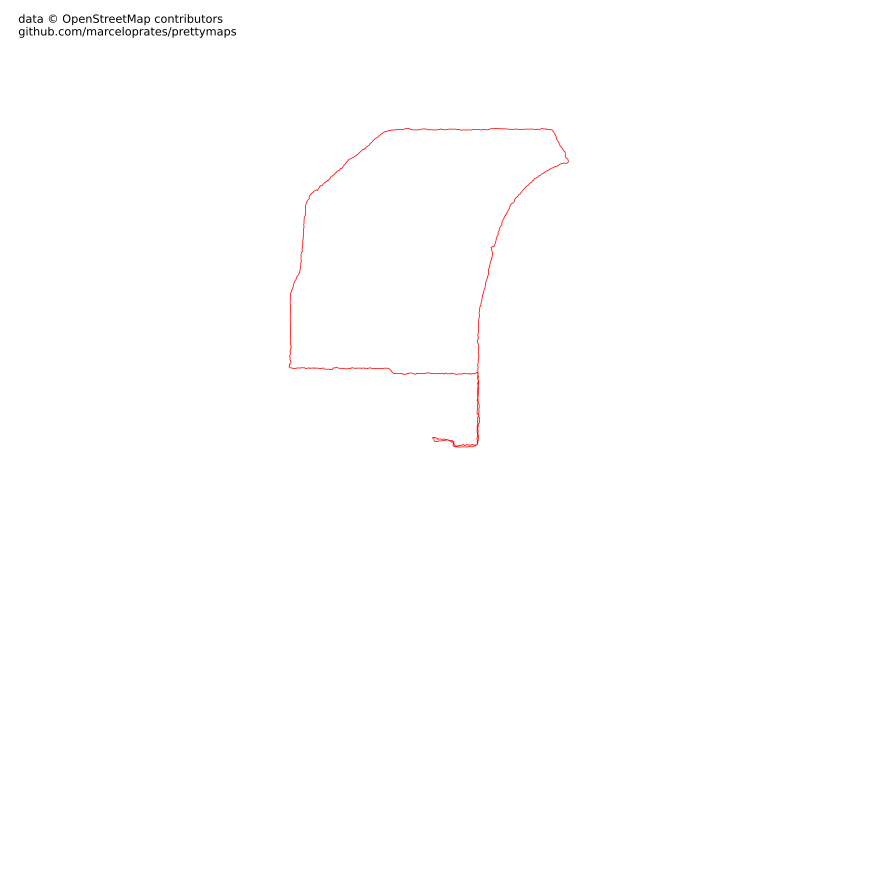

In [4]:
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
  return layers

layers = plot(
    (29.54559,-98.62181), radius = 1100,
    ax = ax,
    postprocessing = postprocessing,
    layers = {
            'perimeter': {},
            'gpx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk.gpx','width': '3'}},
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'gpx': {'fc': '#FF0000', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
        }
)

In [ ]:
import fiona
fiona.listlayers('/content/drive/MyDrive/Afternoon_Walk.gpx')
[u'waypoints', u'routes', u'tracks', u'route_points', u'track_points']
# open layer tracks
layer = fiona.open('/content/drive/MyDrive/Afternoon_Walk.gpx', layer='tracks')
geom = layer[0] # only one feature here)
geom['geometry']['type']
'MultiLineString'
# convert to shapely geometry
from shapely.geometry import shape, mapping
tracks = shape(geom['geometry'])
tracks


polygs = {'type': 'Polygon', 'coordinates': [[(-79.159610379971326, 35.615399458474776), (-79.153546268732796, 35.615411586697256), (-79.153109652723629, 35.611215221720187), (-79.159392071966749, 35.611118195940371), (-79.159610379971326, 35.615399458474776)]]}
poly = shape(polygs)


geometry = poly.intersection(tracks)
mapping(geometry)['type']
'MultiLineString'

import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch
def plot_poly(ax,ob):
   patch = PolygonPatch(ob, facecolor='#6699cc', edgecolor='#6699cc')
   ax.add_patch(patch)
def plot_line(ax, ob, col):
   x, y = ob.xy
   ax.plot(x, y, color=col)
def plot_multiline(ax, ob,col):
   for line in ob:
      plot_line(ax,line,col)

fig = plt.figure() 
ax = fig.gca()
#plot_multiline(ax, tracks,'b')
plot_poly(ax,poly)
plot_multiline(ax, geometry,'r')


In [6]:
ox.utils.config(log_console=True)
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

def postprocessing(layers):
  print(layers['water']);
  return layers

layers = plot(
    (29.54559,-98.62181), radius = 1100,
    ax = ax,
    postprocessing = postprocessing,
    layers = {
            'perimeter': {},
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': False},
            'water': {'tags': {'natural': ['water', 'bay']}},
            'green': {'tags': {'landuse': 'grass', 'natural': ['island', 'wood'], 'leisure': 'park'}},
            'forest': {'tags': {'landuse': 'forest'}},
            'gpx': {'tags':{'gpx_file':'/content/drive/MyDrive/Afternoon_Walk.gpx'}},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}}
        },
        drawing_kwargs = {
            'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
            'perimeter': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'lw': 0, 'hatch': 'ooo...',  'zorder': 0},
            'green': {'fc': '#D0F1BF', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 1},
            'water': {'fc': '#a1e3ff', 'ec': '#2F3737', 'hatch': 'ooo...', 'hatch_c': '#85c9e6', 'lw': 1, 'zorder': 2},
            'parking': {'fc': '#F2F4CB', 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'gpx': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 3},
            'coastline': {'fc': '#FF0000', 'ec': '#FF0000', 'alpha': 1, 'lw': 0, 'zorder': 7},
            'building': {'palette': ['#FFC857', '#E9724C', '#C5283D'], 'ec': '#2F3737', 'lw': .5, 'zorder': 4},
        }
)

# Add meadows, parks & scrubs
for tags, kwargs in [
    ({'landuse': 'meadow'}, {'fc': '#AAD897', 'ec': '#8bc49e', 'lw': 0, 'zorder': 1, 'hatch': 'ooo...'}),
    ({'leisure': 'park'}, {'fc': '#AAD897', 'ec': '#8bc49e', 'lw': 0, 'zorder': 1, 'hatch': 'ooo...'}),
    ({'natural': 'scrub'}, {'fc': '#D2D68D', 'ec': '#AEB441', 'lw': 0, 'zorder': 3, 'hatch': 'ooo...'}),
]:
    ax.add_patch(PolygonPatch(
        unary_union(
            ox.project_gdf(
                ox.geometries_from_point(
                    (-22.9926, -43.4152),
                    tags = tags,
                    dist = 1000
                )
            ).geometry
        ),
        **kwargs
    ))

fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'

tracks_layer = fiona.open(fname, layer='tracks')
feature = tracks_layer[0]
data = {'type': 'MultiLineString',
        'coordinates': feature['geometry']['coordinates']}
shp = shape(data)
print(shp)


R
{'point': (29.54559, -98.62181), 'radius': 1100}
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
EPSG:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5


/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:787: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:787: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx

E
             unique_id  ...          type
0       node/368164568  ...           NaN
1        way/242377359  ...           NaN
2        way/242377360  ...           NaN
3        way/265787926  ...           NaN
4        way/368302848  ...           NaN
..                 ...  ...           ...
306      way/987326901  ...           NaN
307      way/987343060  ...           NaN
308      way/987343061  ...           NaN
309  relation/12095616  ...  multipolygon
310  relation/12095617  ...  multipolygon

[311 rows x 34 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:373: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:373: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry

POLYGON ((537141.8146421409 3269304.49166031, 537136.8735239283 3269304.575076353, 537136.9212299408 3269307.733121951, 537127.4749849959 3269307.890318551, 537127.6360972357 3269317.78556633, 537136.6560336559 3269317.638043464, 537136.6884226648 3269319.566124211, 537142.298029682 3269319.473834188, 537142.2653125032 3269317.645475117, 537151.5952959104 3269317.487907222, 537151.4251387448 3269307.404263694, 537141.8722905746 3269307.572176597, 537141.8146421409 3269304.49166031))
POLYGON ((537183.496889285 3269256.130791829, 537178.5557492876 3269256.214189786, 537178.6034440415 3269259.372235473, 537169.1571574573 3269259.529397497, 537169.3182344702 3269269.424645593, 537178.3382106412 3269269.277155742, 537178.3705561855 3269271.216316741, 537183.9801879196 3269271.124047251, 537183.9475138485 3269269.284607922, 537193.2775017715 3269269.138154365, 537193.1073804775 3269259.054510492, 537183.5448389227 3269259.211276232, 537183.496889285 3269256.130791829))
POLYGON ((537143.21003

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:


+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.575767587, 537418.5358881202 3267716.590920862, 537338.5510413951 3267644.096881469, 537251.8456851366 3267579.791806635, 537159.2548393236 3267524.294989384, 537061.6702044166 3267478.140894405, 536960.0315737949 3267441.774010862, 536855.3177830328 3267415.544571724, 536748.5372831775 3267399.705180828, 536640.718428815 3267394.408380168, 536532.8995744525 3267399.705180828, 536426.1190745973 3267415.544571724, 536321.4052838351 3267441.774010862, 536219.7666532134 3267478.140894405, 536122.1820183065 3267524.294989384, 536029.5911724934 3267579.791806635, 535942.885816235 3267644.096881468, 535862.9009695099 3267716.5

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.575767587, 537418.5358881202 3267716.590920862, 537338.5510413951 3267644.096881469, 537251.8456851366 3267579.791806635, 537159.2548393236 3267524.294989384, 537061.6702044166 3267478.140894405, 536960.0315737949 3267441.774010862, 536855.3177830328 3267415.544571724, 536748.5372831775 3267399.705180828, 536640.718428815 3267394.408380168, 536532.8995744525 3267399.705180828, 536426.1190745973 3267415.544571724, 536321.4052838351 3267441.774010862, 536219.7666532134 32

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:


                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.575767587, 537418.5358881202 3267716.590920862, 537338.5510413951 3267644.096881469, 537251.8456851366 3267579.791806635, 537159.2548393236 3267524.294989384, 537061.6702044166 3267478.140894405, 536960.0315737949 3267441.774010862, 536855.3177830328 3267415.544571724, 536748.5372831775 3267399.705180828, 536640.718428815 3267394.408380168, 536532.8995744525 3267399.705180828, 536426.1190745973 3267415.544571724, 536321.4052838351 3267441.774010862, 536219.7666532134 32

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:261: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in t:
/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:276: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:


POLYGON ((536751.1997115863 3268660.22905516, 536751.4996753734 3268659.128459422, 536751.5042532404 3268659.111046393, 536751.9182673828 3268657.476543759, 536751.9376668746 3268657.380344974, 536751.9475438228 3268657.282707929, 536751.9478031069 3268657.184572923, 536751.9384422298 3268657.086885049, 536751.9195513418 3268656.990585096, 536751.8913123725 3268656.896600484, 536751.8539972788 3268656.805836337, 536751.8079654252 3268656.719166763, 536751.7536601238 3268656.637426436, 536751.6916043643 3268656.561402563, 536751.6223957775 3268656.491827293, 536751.5467008799 3268656.429370675, 536751.4652486549 3268656.3746342, 536751.3788235319 3268656.32814501, 536751.2882578321 3268656.290350822, 536751.1944237525 3268656.261615614, 536751.0982249668 3268656.242216122, 536751.0005879218 3268656.232339174, 536750.9024529158 3268656.23207989, 536750.8047650423 3268656.241440767, 536750.7084650889 3268656.260331655, 536750.6144804771 3268656.288570624, 536750.5237163297 3268656.3258857

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


E
       unique_id  ...                                           geometry
0  way/242377367  ...  POLYGON ((-98.61947 29.55111, -98.61936 29.551...
1  way/242377368  ...  POLYGON ((-98.61813 29.55195, -98.61807 29.551...
2  way/770931903  ...  POLYGON ((-98.61723 29.55266, -98.61723 29.552...
3  way/770931905  ...  POLYGON ((-98.61791 29.55316, -98.61791 29.553...
4  way/788313074  ...  POLYGON ((-98.63013 29.53528, -98.63007 29.536...

[5 rows x 7 columns]
crs2
                         geometry
0  POINT (536640.718 3268494.408)
crs3
                     geometry
0  POINT (-98.62181 29.54559)
crs26
epsg:4326
crs4
+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
crs5
Q
POLYGON ((537740.718428815 3268494.408380168, 537735.4216281545 3268386.589525805, 537719.5822372586 3268279.80902595, 537693.3527981205 3268175.095235188, 537656.9859145774 3268073.456604566, 537610.8318195982 3267975.871969659, 537555.3350023478 3267883.281123846, 537491.029927514 3267796.5757675

/usr/local/lib/python3.7/dist-packages/prettymaps/fetch.py:380: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for t in geometries:
/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:110: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  layers = dict(zip(k, v))
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/usr/local/lib/python3.7/dist-packages/prettymaps/draw.py:78: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` prope

MULTILINESTRING ((-98.62184600000001 29.545548, -98.621898 29.545538, -98.621915 29.545544, -98.621899 29.545545, -98.621909 29.545548, -98.621903 29.545548, -98.62190099999999 29.545547, -98.621892 29.545539, -98.621888 29.545548, -98.62188 29.545542, -98.621877 29.545536, -98.621882 29.545549, -98.621886 29.545546, -98.621883 29.545551, -98.621871 29.545559, -98.62185599999999 29.545557, -98.62182300000001 29.545547, -98.621802 29.545543, -98.621774 29.545523, -98.621765 29.545517, -98.62177 29.545512, -98.621757 29.545516, -98.62175499999999 29.545509, -98.62173900000001 29.545521, -98.62172099999999 29.545521, -98.62172200000001 29.54552, -98.621708 29.545516, -98.621701 29.545518, -98.621695 29.545519, -98.621683 29.545515, -98.621675 29.545512, -98.62165899999999 29.545511, -98.62165 29.545511, -98.621641 29.545512, -98.62163200000001 29.545512, -98.62161999999999 29.545515, -98.62160900000001 29.545517, -98.621599 29.545516, -98.621596 29.545518, -98.621583 29.545517, -98.621575

In [ ]:
import fiona; help(fiona.open)

In [ ]:
# General style parameters
palette = ['#433633', '#FF5E5B']
background_c = '#F2F4CB'
dilate = 100

# Setup plot
fig, ax = plt.subplots(figsize = (12, 12), constrained_layout = True)

layers = plot(
    'Albany, Texas', radius = 2000,
    ax = ax,
    
    layers = {
            'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {'tags': {'natural': ['water', 'bay']}, 'circle': False, 'dilate': dilate},
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False},
            'golf_course':        {'tags': {'leisure': 'golf_course'}},
            'golf_bunker':        {'tags': {'golf': 'bunker'}},
            'golf_fairway':       {'tags': {'golf': 'fairway'}},
            'golf_rough':         {'tags': {'golf': 'rough'}},
            'golf_green':         {'tags': {'golf': 'green'}},
            'golf_hole':          {'tags': {'golf': 'hole'}},
            'golf_tee':           {'tags': {'golf': 'tee'}},
            'golf_driving_range': {'tags': {'golf': 'driving_range'}},
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            'golf_rough':            {'fc': '#C6E8A7', 'ec': '#B1DE89', 'lw': 0, 'zorder': 1,                'hatch': '......'},
            'golf_fairway':          {'fc': '#CDEBB0', 'ec': '#CDEBB0', 'lw': 0, 'zorder': 2},
            'golf_driving_range':    {'fc': '#AAE0CB', 'ec': '#EBD499', 'lw': 0, 'zorder': 2},
            'golf_green':            {'fc': '#AAE0CB', 'ec': '#AAE0CB', 'lw': 0, 'zorder': 4},
            'golf_bunker':           {'fc': '#F5E9C6', 'ec': '#F5E9C6', 'lw': 0, 'zorder': 4},
            'golf_tee':              {'fc': '#CDEBB0', 'ec': '#CDEBB0', 'lw': 0, 'zorder': 4},
            'golf_hole':             {'fc': '#FF0000', 'ec': '#FF0000', 'lw': 1, 'zorder': 7},
            
        },

        osm_credit = {'x': .405, 'y': .68, 'color': '#2F3737'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
a = .2
ax.set_xlim(xmin+a*dx, xmax-a*dx)
ax.set_ylim(ymin+a*dy, ymax-a*dy)

ax.text(
    xmin+.39*dx, ymin+.305*dy,
    ' '*3 + 'Albany, Texas',
    color = '#FF0000',
    zorder = 6, rotation = +1.75,
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 24)
)

#plt.savefig('../prints/heerhugowaard.png')

# of features:
--------------
 1
Feature attribute data:
-----------------------
name: Afternoon Walk
cmt: None
desc: None
src: None
link1_href: None
link1_text: None
link1_type: None
link2_href: None
link2_text: None
link2_type: None
number: None
type: 10


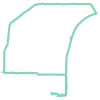

In [13]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks')
(feature) = tracks_layer[0]
print()
# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape


{'type': 'MultiLineString', 'coordinates': [[(-98.621846, 29.545548), (-98.621898, 29.545538), (-98.621915, 29.545544), (-98.621899, 29.545545), (-98.621909, 29.545548), (-98.621903, 29.545548), (-98.621901, 29.545547), (-98.621892, 29.545539), (-98.621888, 29.545548), (-98.62188, 29.545542), (-98.621877, 29.545536), (-98.621882, 29.545549), (-98.621886, 29.545546), (-98.621883, 29.545551), (-98.621871, 29.545559), (-98.621856, 29.545557), (-98.621823, 29.545547), (-98.621802, 29.545543), (-98.621774, 29.545523), (-98.621765, 29.545517), (-98.62177, 29.545512), (-98.621757, 29.545516), (-98.621755, 29.545509), (-98.621739, 29.545521), (-98.621721, 29.545521), (-98.621722, 29.54552), (-98.621708, 29.545516), (-98.621701, 29.545518), (-98.621695, 29.545519), (-98.621683, 29.545515), (-98.621675, 29.545512), (-98.621659, 29.545511), (-98.62165, 29.545511), (-98.621641, 29.545512), (-98.621632, 29.545512), (-98.62162, 29.545515), (-98.621609, 29.545517), (-98.621599, 29.545516), (-98.62159

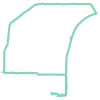

In [18]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks')
feature = tracks_layer[0]
print(feature['geometry'])
# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape


In [27]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
# Open tracks layer
tracks_layer = fiona.open(fname, layer='tracks',crs_wkt=dict(ellps='WGS84', datum='WGS84', proj='longlat'))
feature = tracks_layer[0]
print(feature['geometry'])
print(tracks_layer.crs)

original = dict(ellps='WGS84', datum='WGS84', proj='longlat')

tracks_layer.crs = {'init':original}

# Print out the number of features in the tracks layer
print("# of features:\n--------------\n", len(list(tracks_layer.items())))

# Print out fields and attribute data
properties = feature['properties']
print("Feature attribute data:\n-----------------------")
for k, v in properties.items():
    print('{}: {}'.format(k,v))

# Draw a quick plot of data using shapely
from shapely.geometry import shape
tracks_data = {'type': 'MultiLineString',
               'coordinates': feature['geometry']['coordinates']}
tracks_shape = shape(tracks_data)
tracks_shape

{'type': 'MultiLineString', 'coordinates': [[(-98.621846, 29.545548), (-98.621898, 29.545538), (-98.621915, 29.545544), (-98.621899, 29.545545), (-98.621909, 29.545548), (-98.621903, 29.545548), (-98.621901, 29.545547), (-98.621892, 29.545539), (-98.621888, 29.545548), (-98.62188, 29.545542), (-98.621877, 29.545536), (-98.621882, 29.545549), (-98.621886, 29.545546), (-98.621883, 29.545551), (-98.621871, 29.545559), (-98.621856, 29.545557), (-98.621823, 29.545547), (-98.621802, 29.545543), (-98.621774, 29.545523), (-98.621765, 29.545517), (-98.62177, 29.545512), (-98.621757, 29.545516), (-98.621755, 29.545509), (-98.621739, 29.545521), (-98.621721, 29.545521), (-98.621722, 29.54552), (-98.621708, 29.545516), (-98.621701, 29.545518), (-98.621695, 29.545519), (-98.621683, 29.545515), (-98.621675, 29.545512), (-98.621659, 29.545511), (-98.62165, 29.545511), (-98.621641, 29.545512), (-98.621632, 29.545512), (-98.62162, 29.545515), (-98.621609, 29.545517), (-98.621599, 29.545516), (-98.62159

AttributeError: ignored

In [ ]:
fname = '/content/drive/MyDrive/Afternoon_Walk.gpx'
lines = gpd.read_file(fname, layer='tracks')
print(lines)

             name   cmt  ... type                                           geometry
0  Afternoon Walk  None  ...   10  MULTILINESTRING ((-98.62185 29.54555, -98.6219...

[1 rows x 13 columns]
